In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
198060,198060,299170,299171,In a power system.what vt measures the grid vo...,"When the Death Star destroys a planet, does it...",0
8498,8498,16563,16564,What is liquid nitrogen?,How do you get liquid nitrogen?,0
328763,328763,455340,455341,How much would you pay for a desk space per day?,Where can you find like-minded people to trave...,0
260431,260431,376393,121042,"Does crime cause poverty, or does poverty caus...",What are the connections between poverty and c...,1
234857,234857,345447,345448,Would all countries eventually merge into one?,When will all countries merge to one?,1
263680,263680,380263,380264,Which sentence is more grammatically correct: ...,"Is 'I love you, Monkey' grammatically correct?",0
97984,97984,162908,162909,Where are the best places around the world to ...,Where are the best places around the world to ...,1
287047,287047,353377,407730,How do I make my wrist stronger?,How can you do to make your wrists stronger?,1
221689,221689,329093,329094,What are the best free Chinese-English/English...,"What is ""hi"" in Chinese?",0
373687,373687,125520,504529,Why is weed illegal?,Why do drug laws exist?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
#missing values check 
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
#any duplicated rows?
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

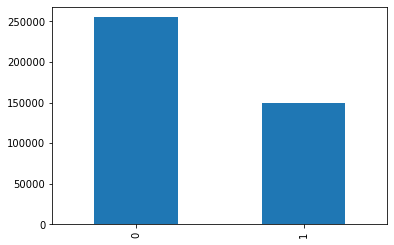

In [12]:
#distribution of duplicate and non-duplicate question, how many question pairs are dublicated and how many are not
print(df['is_duplicate'].value_counts()) #find values of 1s and 0s
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100) #gets the percent of 1s and 0s
df['is_duplicate'].value_counts().plot(kind='bar') #plot it

In [13]:
#finding repeated questions 

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist()) #questions in 1 and 2
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


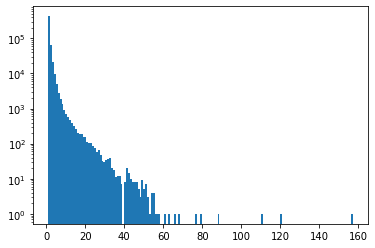

In [14]:
#Repeated questions histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()